## Scipy 통계 모듈 - stats
: 파이썬을 사용한 기본 통계
- 기술 통계량, 랜덤 수, 확률 변수, 분포 및 가설 검정 계산

## 1. 모듈 임포트

In [ ]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 2. 통계 및 확률 리뷰

##### 평균

In [ ]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

##### 중앙값

In [ ]:
np.median(x)

3.0

##### 최솟값, 최댓값

In [ ]:
x.min(), x.max()

(0.9, 6.7)

##### 분산

In [ ]:
x.var()

3.0700000000000007

##### 표준편차

In [ ]:
x.std()

1.7521415467935233

##### ddof: 델타 자유도

In [ ]:
x.var(ddof=1)

3.5085714285714293

In [ ]:
x.std(ddof=1)

1.8731181032095732

## 3. 랜덤 수 
- rand
- randn: 표준 정규분포를 따르는 랜덤 수
- randint: 주어진 최저와 최대 사이에서 균등 분포하는 랜덤 정수

In [ ]:
np.random.rand()

0.9257936495576936

In [ ]:
np.random.randn()

1.2364281581166552

### 랜덤 배열 

In [ ]:
np.random.rand(5)

array([0.66144809, 0.36796331, 0.69257675, 0.18922859, 0.97011494])

In [ ]:
np.random.randn(2, 4)   # 2x4 배열 생성

array([[-0.95396491,  0.22690127, -0.54034511, -1.12278039],
       [-1.04979909,  0.17219181, -0.91246167,  0.60904405]])

In [ ]:
np.random.randint(10, size=10)  # 배열 길이 10, 10 이하의 랜덤 정수 배열 생성
# 상한선 또는 상한선과 하한선을 모두 인수로 제공해야  함


array([8, 1, 1, 7, 2, 1, 6, 1, 8, 7])

In [ ]:
np.random.randint(low=10, high=20, size=(2, 10)) # 10~20 으로 구성된 2x10 랜덤 정수 배열 생성

array([[18, 11, 18, 13, 19, 19, 10, 16, 11, 16],
       [11, 18, 17, 11, 16, 16, 10, 13, 15, 17]])

Text(0.5, 1.0, 'randint(low=1, high=10')

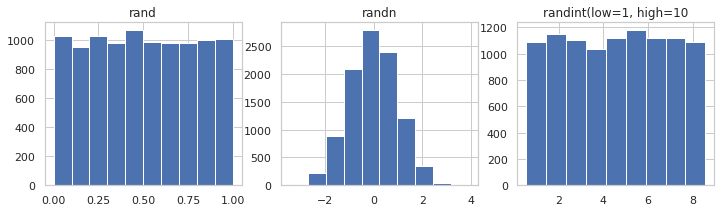

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10")

↑ rand와 randint의 분포는 균일해보이지만 다른 범위와 유형을 갖고 있는 반면,  
randn으로 생성한 숫자의 분포는 예상대로 0을 중심으로 한 가우스 곡선과 유사하다. (정규분포)

##### choice: 모집단에서 원소를 랜덤으로 추출 (복원 or 비복원) 

In [ ]:
np.random.choice(10, 5, replace=False)  # (모집단의 원소 개수, 추출할 원소 개수, 복원 여부)

array([0, 1, 8, 3, 5])

##### seed: 랜덤 수 발생기를 특정 상태(항상 동일한 램덤 수)로 초기화하는 숫자

In [ ]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

#### RandomState 클래스
: np.random 모듈의 함수를 직접 사용하지 않고 randomState 인스턴스를 사용하면  
랜덤 수 발생기의 상태에 대한 보다 미세한 수준의 제어가 가능하고, 전역 상태 변수에 의존하지 않으며 코드의 독립성을 개선한다.
- x^2 (chisqure)
- 스튜던트-t 분포 (standard_t)
- F 분포 (f)
- 이산 이항 분포
- 푸아송 분포

In [ ]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [ ]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [ ]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [ ]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [ ]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [ ]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

## 4. 확률 변수 및 분포 

### Scipy stats의 확률 변수 클래스

In [ ]:
X = stats.norm(1, 0.5)  # 평균 = 1, 표준편차 = 0.5인 정규분포 생성

##### 기술 통계량

In [ ]:
X.mean()  # 평균

1.0

In [ ]:
X.median()  # 중앙값

1.0

In [ ]:
X.std()  # 표준편차

0.5

In [ ]:
X.var()  # 분산

0.25

##### 임의 차수의 비중심 모멘트 

In [ ]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

##### stats 메서드
: 분포-종속 통계량 리스트 (정규분포 확률변수에 대한 평균과 분산)

In [ ]:
X.stats()

(array(1.), array(0.25))

##### 확률 분포 함수

In [ ]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

##### 누적 분포 함수

In [ ]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

##### 신뢰 구간

In [ ]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [ ]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

##### 도식화 

In [ ]:
def plot_rv_distribution(X, axes=None):
  if axes is None:
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))

  x_min_999, x_max_999 = X.interval(0.999)
  x999 = np.linspace(x_min_999, x_max_999, 1000)
  x_min_95, x_max_95 = X.interval(0.95)
  x95 = np.linspace(x_min_95, x_max_95, 1000)

  if hasattr(X.dist, "pdf"):
    axes[0].plot(x999, X.pdf(x999), label = "PDF")
    axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)

  else:
    x999_int = np.unique(x999.astype(int))
    axes[0].bar(x999_int, X.pmf(x999_int), label = "PMF")
    
  axes[1].plot(x999, X.cdf(x999), label="CDF")
  axes[1].plot(x999, X.sf(x999), label="SF")
  axes[2].plot(x999, X.ppf(x999), label="PPF")

  for ax in axes:
    ax.legend()

Text(0, 0.5, 'Poisson dist.')

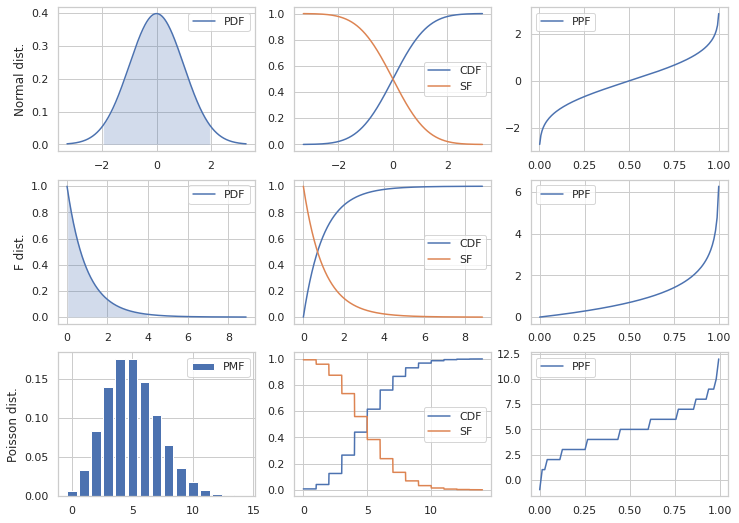

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

- 클래스 메서드에 매개변수를 인수로 전달

In [ ]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

- 클래스 인스턴스를 만든 후 메서드 호출

In [ ]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

##### rvs: 확률분포에 따라 분포하는 랜덤 수 추출

In [ ]:
X = stats.norm(1, 0.5)  # 정규분포 생성
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

##### 도식화: 실제 해당 확률 분포 함수 확인

In [ ]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
  if ax is None:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

  x_lim = X.interval(.99)
  x = np.linspace(*x_lim, num=100)
  ax.plot(x, X.pdf(x), label = "PDF", lw=3)
  ax.hist(X_samples, label="samples", density=1, bins=75)
  ax.set_xlim(*x_lim)
  ax.legend()

  if title:
    ax.set_title(title)
  return ax

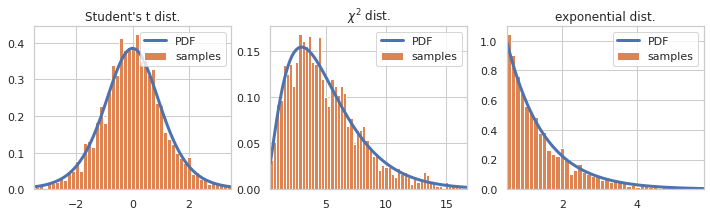

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
X = stats.t(7.0)  # 스튜던트-t 분포
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)  # 카이-제곱 분포
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)  # 지수 분포
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

#### 최대 우도 적합화
: 주어진 데이터를 관찰할 우도를 최대화할 수 있는 미지의 매개변수 탐색

In [ ]:
X = stats.chi2(df=5)  # 자유도가 5인 카이-제곱 분포 생성
X_samples = X.rvs(500)  # 랜덤 표본 추출
df, loc, scale = stats.chi2.fit(X_samples)  # 재적합화
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

In [ ]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

##### 도식화

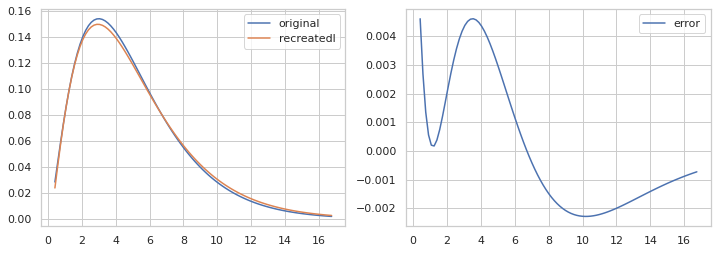

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(0.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreatedl")
axes[0].legend()
axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

## 5. 가설 검정 
: 주장(가설)의 타당성 여부를 데이터에 기초해 평가하는 체계적인 방법론.

- 귀무가설: 현재 인정되고 있는 지식의 상태.
- 대립가설: 현재 지식 상태에 도전하는 새로운 주장.  
  

1. 귀무 가설과 대립 가설을 유형화한다.  
2. 귀무 가설이 속해 있는 것으로 알려진 표본 분포에 따라 검정 통계량을 선택한다. (정확하거나 근사)  
3. 자료를 수집한다.
4. 데이터에서 검정 통계량을 계산하고 귀무 가설하에서 p-값을 계산한다.
5. p-값이 사전에 정한 유의 수준 alpha 보다 작을 경우, 귀무 가설을 기각한다.  
p-값이 크면 귀무 가설을 기각하지 못한다.

두 가지 오류
- 제1형 오류: 실제로 기각돼서는 안 되는 귀무 가설을 잘못으로 기각할 수 있다.
- 제2형 오류: 귀무 가설이 기각돼야 하지만 오류로 인해 기각하지 않을 수 있다.

### 예1

#### 정규표본화

In [ ]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)  # 100개의 랜덤 표본 추출

In [ ]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))  # 정규화
z

-3.4854895810383546

모집단의 분산 --> 표본 표준편차 대체 *가능*

In [ ]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))  # 정규화
t

-3.6398958318358803

#### 통계량 검정

##### ppf: 특정 유의 수준에 해당하는 통계량 값 조회

In [ ]:
stats.norm().ppf(0.025)  # 유의 수준 5% (각 측면에서 2.5%)에 대한 양측 가설 검정

-1.9599639845400545

: 관측 통계량은 약 -4.58이고, 유의 수준 5% 양측 검정의 임계값 -1.95보다 작으므로 이 경우는 귀무 가설을 기가할 만한 충분한 근거가 된다.

##### cdf: 관측 검정 통계량의 p-값을 명시적으로 계산

In [ ]:
2 * stats.norm().cdf(-abs(z))

0.0004912373531708969

: p-값이 실제로 작아 귀무 가설의 기각을 뒷받침한다.

##### t 분포

In [ ]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.00043576106092704385

: 이번에도 p-값이 매우 작아, 귀무 가설을 기각해야 한다는 것을 시사한다.

##### stats.ttest_1samp function: 검정 통계량과 p-값을 바로 계산.

In [ ]:
t, p = stats.ttest_1samp(X_samples, mu)
t

0.5373030921115854

In [ ]:
p

0.5922639060659387

: p-값이 매우 작다는 것을 알 수 있으므로 귀무 가설을 기가해야 한다.

##### 도식화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


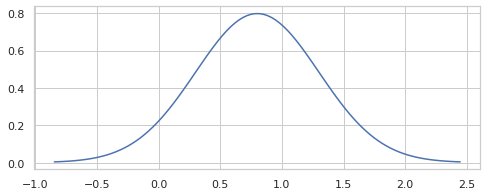

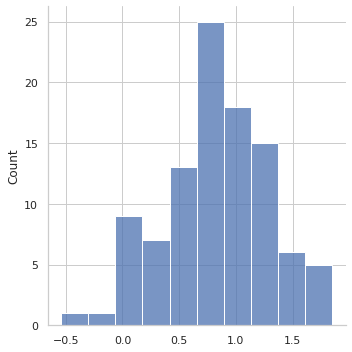

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.displot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

### 예2

In [ ]:
n, sigma = 50, 1.0
# 각 확률 변수별로 50개의 표본 선택
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [ ]:
t, p = stats.ttest_ind(X1_sample, X2_sample) 
t

-0.47308827445643464

In [ ]:
p

0.6372022488207805

: p-값은 0.6으로 귀무 가설을 기각하고 두 모집단 평균이 다르다고 판단할 수 있을 만큼 작지 않다.

In [ ]:
mu1, mu2  # 두 모집단의 평균이 다름

(0.6037385944044388, 0.7820692519785486)

## 6. 비매개변수 기법

In [ ]:
X = stats.chi2(df=5)
X_sample = X.rvs(100)

In [ ]:
kde = stats.kde.gaussian_kde(X_samples)

In [ ]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


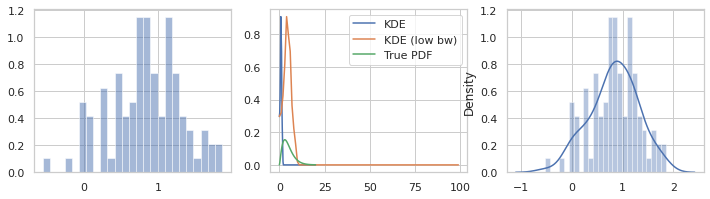

In [ ]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

#### KDE값에 대한 CDF, PPF를 사용한 통계 가설 검정

In [ ]:
kde.resample(10)

array([[0.80313835, 1.19555336, 1.18097579, 0.84642182, 0.91481138,
        1.09340712, 0.54399788, 0.67089135, 0.11964878, 0.95740741]])

In [ ]:
def _kde_cdf(x):
  return kde.integrate_box_1d(-np.inf, x)  # 1차원 KDE
kde_cdf = np.vectorize(_kde_cdf)

In [ ]:
def _kde_ppf(q):
  return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.
                         dataset.mean(), args=(q,))[0]  # 그 역 ppf 찾기

kde_ppf = np.vectorize(_kde_ppf)

#### 신뢰 구간 계산

In [ ]:
kde_ppf([0.05, 0.95])  # 90%의 신뢰 구간 계산

array([-0.03585262,  1.62044755])